In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\SAMUEL\Desktop\DATAMITES\Machine Learning\Linear Regression\\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis =1,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Descriptive Statistics 

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

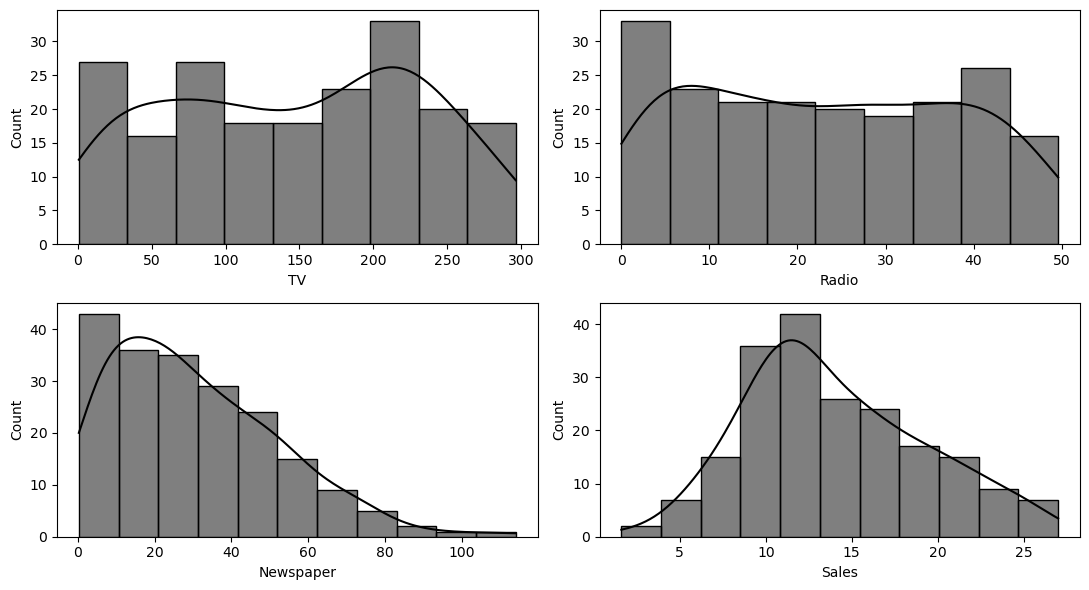

In [9]:
plt.figure(figsize = (11,6))
a = 1                       # here a is used to add a by 1 in every iteration (for subplot)
for i in df:
    plt.subplot(2,2,a)  # here 2,2 means 2 row 2 column   a mens where to apply plot in 2,2 matrix 
    sns.histplot(x = i,data = df,kde = True,color = "black")
    a = a+1
plt.tight_layout() # here tight layout adjust subplot layout 
    

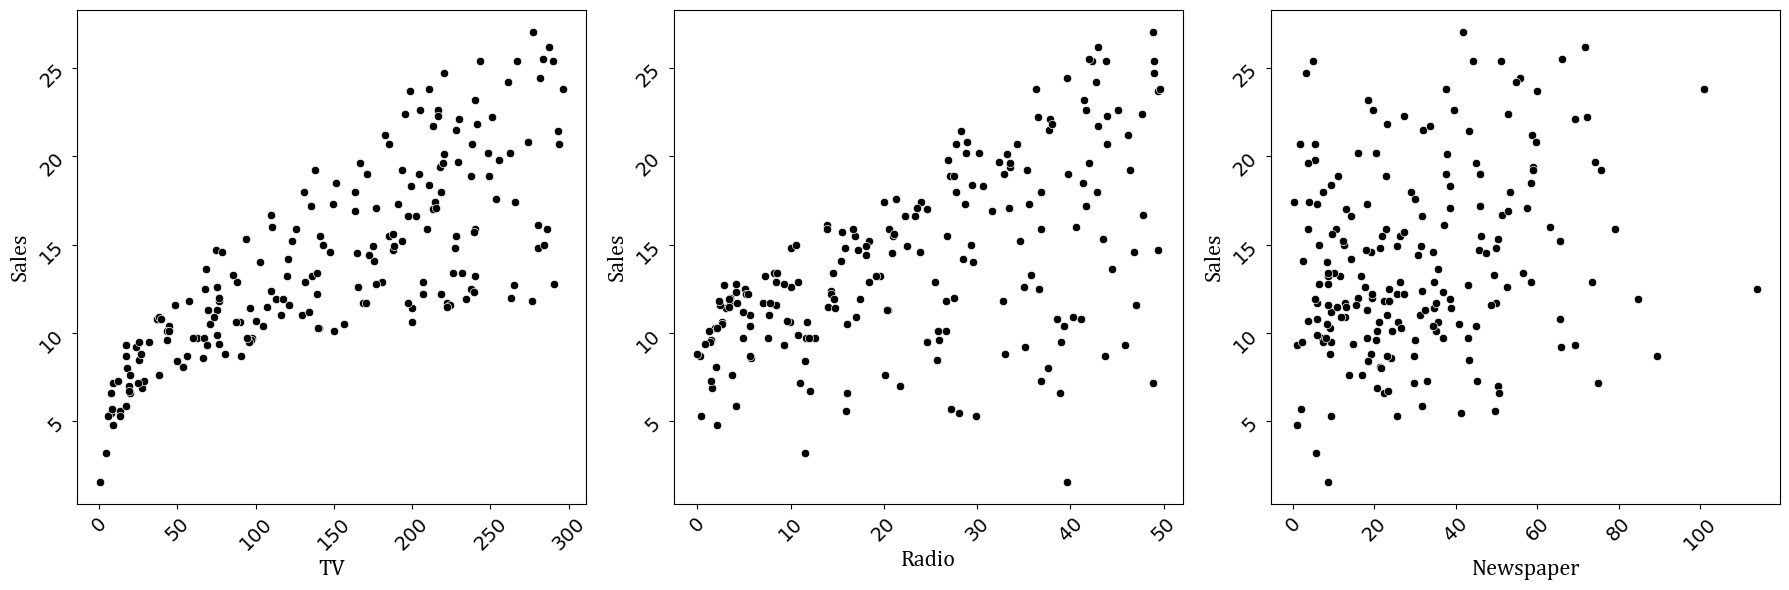

In [10]:
plt.figure(figsize = (18,6))
a = 1
for i in df.drop("Sales",axis = 1):
    plt.subplot(1,3,a)
    sns.scatterplot(x=i,y="Sales",data=df,color="black")
    plt.xticks(fontsize=14,rotation =45)    # here rotation = number rotation
    plt.yticks(fontsize=14,rotation =45)
    plt.xlabel(i,fontsize=16,fontfamily='Cambria')
    plt.ylabel('Sales',fontsize=16,fontfamily='Cambria')
    a = a+1
plt.tight_layout()

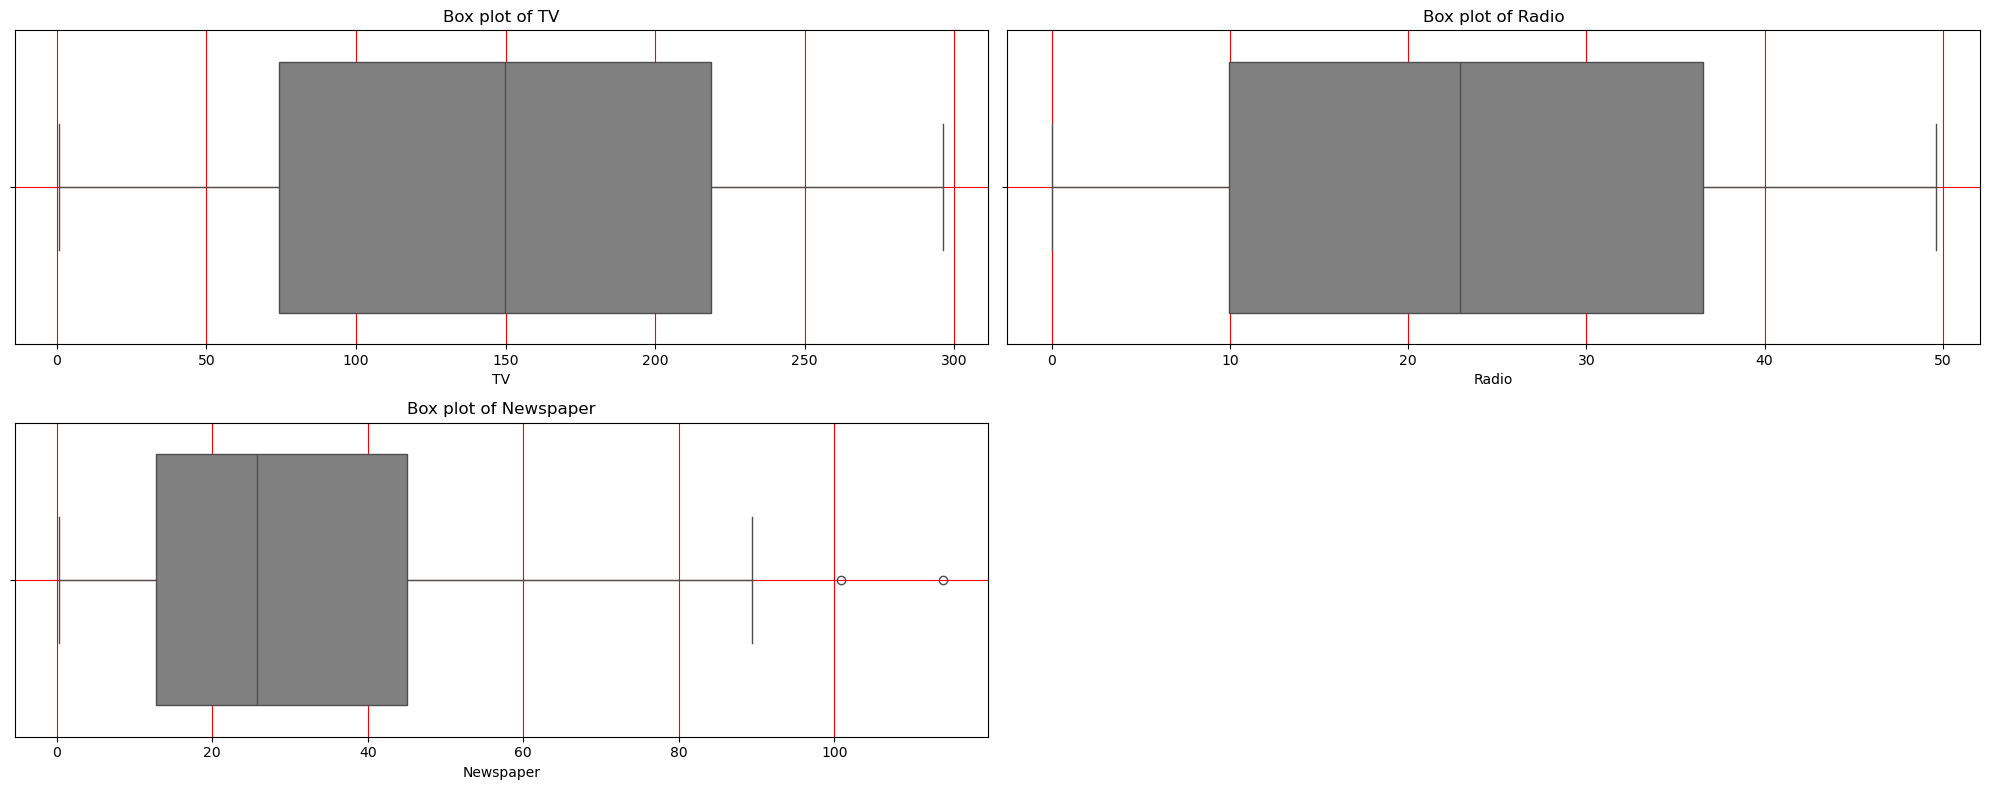

In [11]:
plt.figure(figsize=(20,8))
a = 1
for i in df.drop("Sales",axis = 1):
    plt.subplot(2,2,a)
    sns.boxplot(x=i,data=df,color="grey")
    plt.grid(color="red")
    plt.title(f"Box plot of {i}") # f string
    a=a+1
plt.tight_layout()
    
    

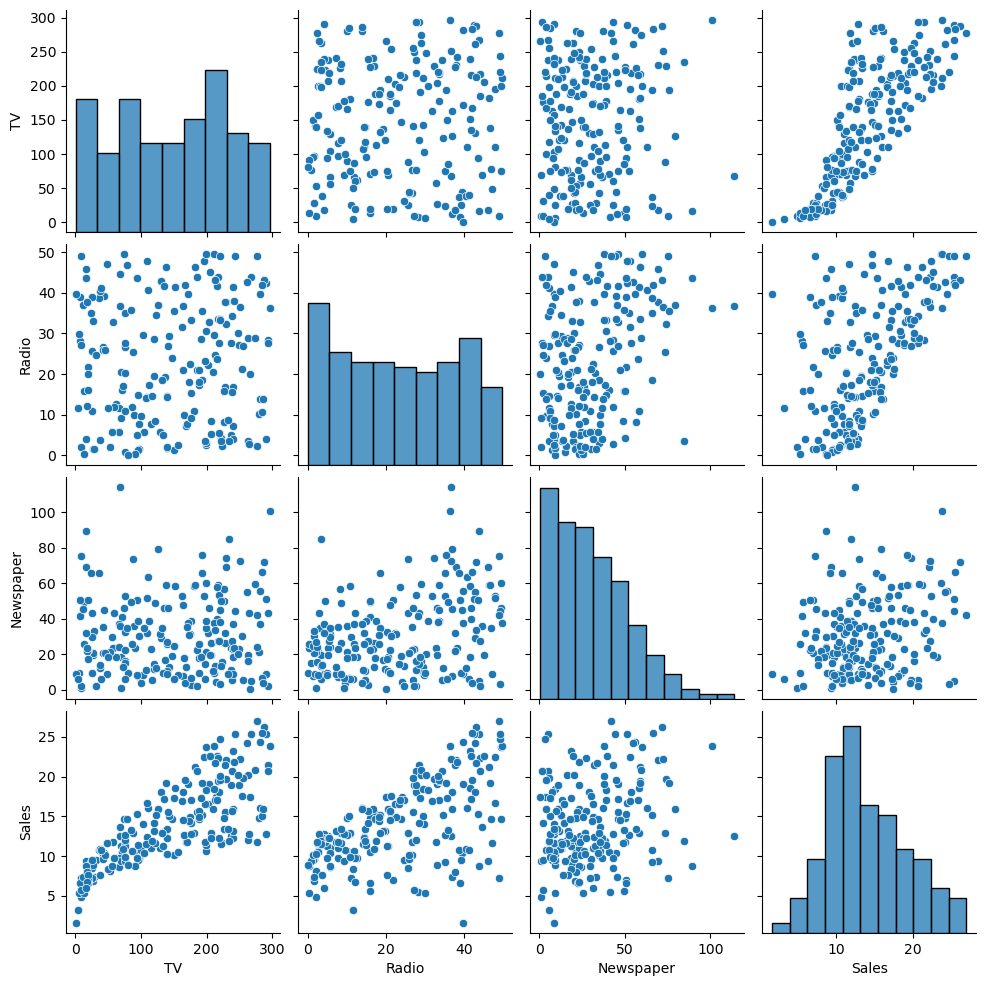

In [12]:
sns.pairplot(df)     # it shows histplot beacause scatterplot cannot be draw on same feature

<Axes: xlabel='Sales', ylabel='Count'>

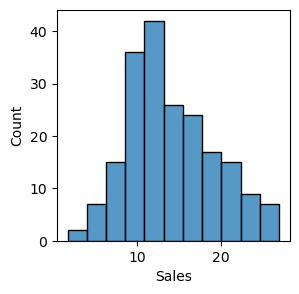

In [13]:
plt.figure(figsize = (3,3))
sns.histplot(x = "Sales",data = df)

<Axes: >

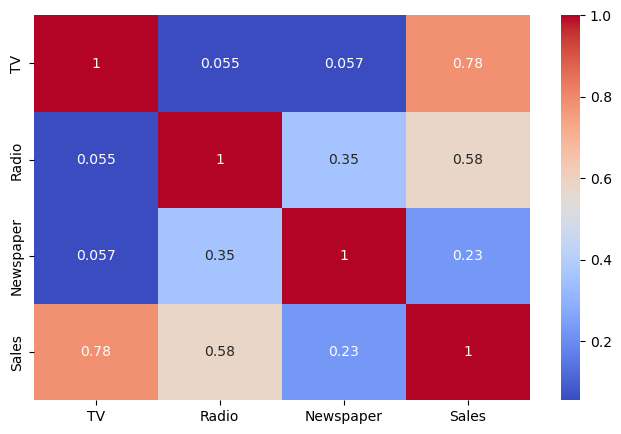

In [14]:
plt.figure(figsize=(8,5))
corr =df.corr()
sns.heatmap(corr,cmap = "coolwarm",annot = True)

# Transformation

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
sc = scaler.fit_transform(df.drop("Sales",axis=1))
sc

array([[0.77578627, 0.76209677, 0.60598065],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384],
       [0.02705445, 0.9858871 , 0.65699208],
       [0.19208657, 0.66129032, 0.20404573],
       [0.4041258 , 0.39516129, 0.09938434],
       [0.02671627, 0.04233871, 0.00615655],
       [0.67331755, 0.05241935, 0.18381706],
       [0.2211701 , 0.11693548, 0.21020229],
       [0.72370646, 0.48387097, 0.03254178],
       [0.07811972, 0.70766129, 0.5769569 ],
       [0.32735881, 0.15322581, 0.06068602],
       [0.68785932, 0.66330645, 0.40193492],
       [0.65843761, 0.96169355, 0.46262093],
       [0.22691917, 0.73790323, 1.        ],
       [0.94927291, 0.7983871 , 0.48812665],
       [0.2316537 , 0.41330645, 0.15831135],
       [0.49577274, 0.48185484, 0.16534741],
       [0.73621914, 0.55846774, 0.46701847],
       [0.80047345, 0.10282258, 0.20404573],
       [0.

In [19]:
x = pd.DataFrame((sc),columns =(['TV', 'Radio', 'Newspaper']))
x.head()

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


or

In [21]:
x = pd.DataFrame((sc),columns=df.drop('Sales',axis=1).columns)

In [22]:
x.head()

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994


In [23]:
y = df["Sales"]

In [24]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting data 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.head()

,TV,Radio,Newspaper
79,0.389922,0.155242,0.200528
197,0.596212,0.187500,0.053650
38,0.143389,0.538306,0.306069
24,0.208319,0.254032,0.158311
122,0.755157,0.048387,0.134565


# Model Creation

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_hat = lr.predict(x_test)

In [34]:
pd.Series(y_hat)

0     16.408024
1     20.889882
2     21.553843
3     10.608503
4     22.112373
5     13.105592
6     21.057192
7      7.461010
8     13.606346
9     15.155070
10     9.048320
11     6.653283
12    14.345545
13     8.903493
14     9.689590
15    12.164944
16     8.736284
17    16.265073
18    10.277596
19    18.831091
20    19.560367
21    13.251035
22    12.336207
23    21.306951
24     7.827403
25     5.809574
26    20.757532
27    11.981381
28     9.183496
29     8.506699
30    12.466468
31    10.003377
32    21.387671
33    12.249664
34    18.266615
35    20.137663
36    14.055140
37    20.854112
38    11.017444
39     4.568996
dtype: float64

# Model Evaluation

Text(0, 0.5, 'y_hat')

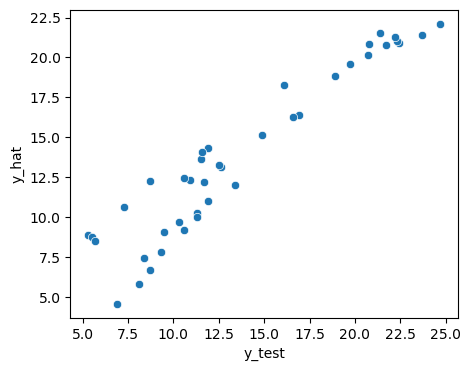

In [36]:
plt.figure(figsize=(5,4))
sns.scatterplot(x = y_test, y = y_hat)
plt.xlabel("y_test")
plt.ylabel("y_hat")


<Axes: xlabel='Sales', ylabel='Density'>

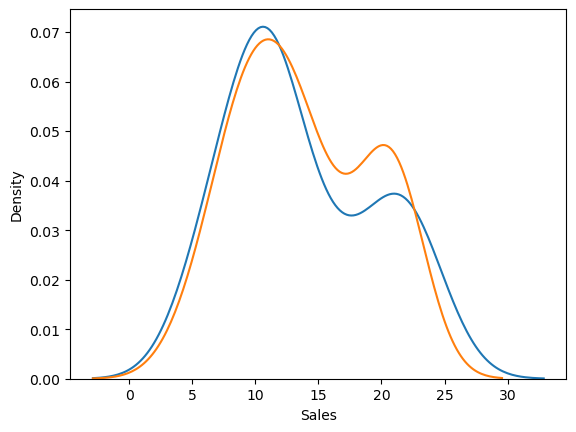

In [37]:
sns.distplot(y_test,hist = False)
sns.distplot(y_hat , hist = False)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mse = mean_squared_error(y_test,y_hat)
mse

3.1740973539761046

In [40]:
rmse = mse*0.5
rmse                  # root mean squared error

1.5870486769880523

In [41]:
mae = mean_absolute_error(y_test,y_hat)
mae

1.4607567168117606

In [42]:
r2 = r2_score(y_test,y_hat)
r2

0.899438024100912

adj_r2 = 1-((1-r2)*(n-1))/(n-p-1)


In [44]:
x_test.shape  # here  n=40 , p = 3

(40, 3)

In [45]:
adj_r2 = 1-((1-r2)*(40-1))/(40-3-1)
adj_r2

0.8910578594426547

In [46]:
l = [[mse,rmse,mae,r2,adj_r2]]      # must be 2d for df

In [47]:
bar = pd.DataFrame((l),columns = ["mse","rmse","mae","r2","adj_r2"])
bar

,mse,rmse,mae,r2,adj_r2
0,3.174097,1.587049,1.460757,0.899438,0.891058


<Axes: >

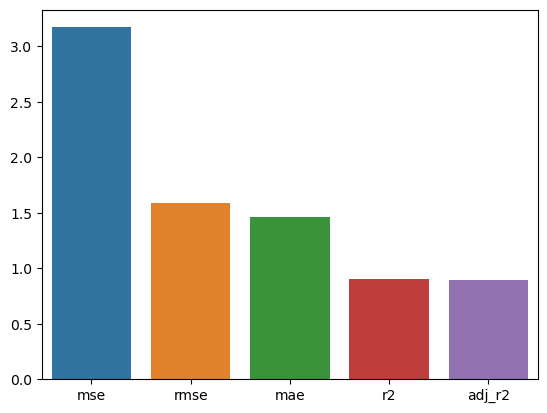

In [48]:
sns.barplot(bar)

# Finding best r2

In [50]:
dummy_lr = LinearRegression()
rand_state=[]
dummy_r2=[]
for i in range(43):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    dummy_lr.fit(x_train,y_train)
    y_hat = dummy_lr.predict(x_test)
    dummy_r2.append(r2_score(y_test,y_hat))
    rand_state.append(i)
    
    

In [51]:
np.max(dummy_r2)

0.9308589334107374

In [52]:
np.argmax(dummy_r2)    # gives index numbe of max r2

13

# Implementing best random state

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13,test_size = 0.2)  # random_state same rows for evertime(0-42)

In [55]:
best_lr = LinearRegression()

In [56]:
best_lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred = best_lr.predict(x_test)
y_pred 

array([12.41367767,  5.32067348, 16.55144938, 12.36717245, 12.71077284,
       23.63881378, 21.62206727, 14.74035857, 22.19982768, 15.32872133,
       16.21757736,  6.10442096,  7.88988888, 18.91129331, 17.68863982,
       16.7673735 ,  8.42129698,  9.69259232, 20.29047962, 17.71616686,
       12.01762517,  7.84345791, 21.58818774, 12.12397718, 17.11548063,
       19.33168908, 10.05575241, 14.1727504 , 23.07525292,  8.76424307,
       15.4412187 , 18.25749861, 17.77840777,  7.04391172, 16.88038275,
        8.86721612, 10.0519968 , 20.67873857,  5.40059981, 10.49904798])

In [58]:
best_r2 = r2_score(y_test,y_pred)
best_r2

0.9308589334107374

In [59]:
best_adj_r2 = 1-((1-best_r2)*(40-1))/(40-3-1)
best_adj_r2

0.9250971778616323

<Axes: xlabel='Sales', ylabel='Density'>

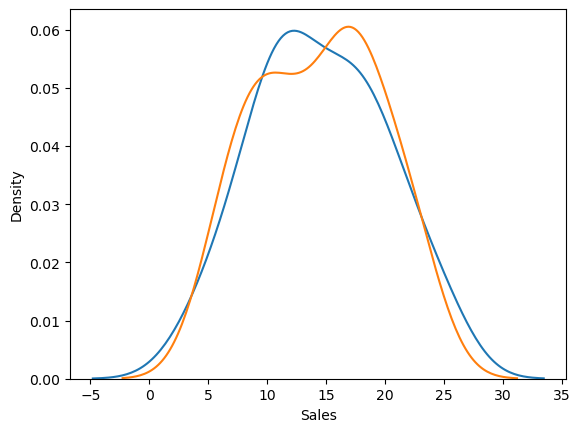

In [60]:
sns.distplot(y_test , hist = False )
sns.distplot(y_pred, hist = False)

In [61]:
l = [[r2,adj_r2],[best_r2,best_adj_r2]]
l

[[0.899438024100912, 0.8910578594426547],
 [0.9308589334107374, 0.9250971778616323]]

In [62]:
df_r2 = pd.DataFrame((l),columns = ["before","after"])
df_r2

,before,after
0,0.899438,0.891058
1,0.930859,0.925097


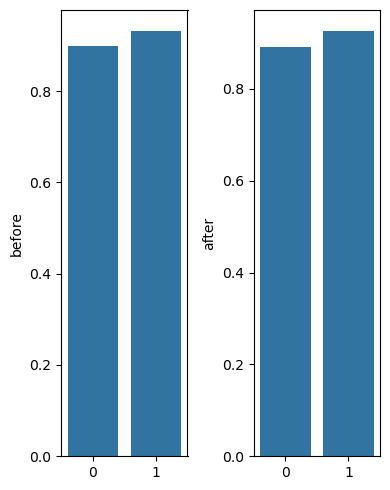

In [63]:
plt.figure(figsize=(4,5))
a=1
for i in df_r2:
    plt.subplot(1,2,a)
    sns.barplot(df_r2[i])
    a+=1
plt.tight_layout()

# Saving model using pickle

In [65]:
import pickle

In [66]:
with open ("myfirstmodel.pkl","wb") as file:
    pickle.dump(best_lr,file)

In [67]:
scaler

MinMaxScaler()

In [68]:
with open ("myscaler.pkl","wb") as file:
    pickle.dump(scaler,file)

# Ridge Regression

In [130]:
from sklearn.linear_model import Ridge

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13,test_size = 0.2) 

In [136]:
ridge_model = Ridge(alpha=0)
ridge_model

Ridge(alpha=0)

In [138]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0)

In [144]:
y_hat_ridge = ridge_model.predict(x_test)

In [150]:
r2_ridge = r2_score(y_test,y_hat_ridge)
r2_ridge

0.9308589334107374

# Finding best alpha

In [168]:
r2_ridge = []
for i in range(20):
    ridge_model = Ridge(alpha=i,random_state = 17)
    ridge_model.fit(x_train,y_train)
    y_hat_ridge = ridge_model.predict(x_test)
    r2_ridge.append(r2_score(y_test,y_hat_ridge))
print("best r2 = ", np.max(r2_ridge))
print("best alpha = ", np.argmax(r2_ridge))

best r2 =  0.9308589334107374
best alpha =  0


# Lasso Regression

In [164]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

In [177]:
r2_lasso = []
for i in range(20):
    lasso_model = Lasso(alpha=i,random_state=17)
    lasso_model.fit(x_train,y_train)
    y_hat_lasso=lasso_model.predict(x_test)
    r2_lasso.append(r2_score(y_test,y_hat_lasso))
print("best r2 =", np.max(r2_lasso))
print("best alpha = ", np.argmax(r2_lasso))
    
    

best r2 = 0.9308589334107374
best alpha =  0
